 # Logistic Regression Model for User Authentication based on Keystroke Dynamics.
 
 Below is the implementation of the logistic regression machine learning model using Scikit-learn module.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

# Load and explore data

In [8]:
data = pd.read_csv("KeystrokeData.csv")

In [9]:
data.head()

,User,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,...,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return,Target
0,Nikhil,0.119,0.272,0.153,0.103,0.208,0.105,0.103,0.288,0.185,...,0.328,0.225,0.135,0.264,0.129,0.111,0.311,0.200,0.112,Genuine
1,Nikhil,0.119,0.272,0.153,0.103,0.216,0.113,0.103,0.287,0.184,...,0.312,0.209,0.151,0.272,0.121,0.110,0.304,0.194,0.151,Genuine
2,Nikhil,0.127,0.352,0.225,0.143,0.240,0.097,0.143,0.344,0.201,...,0.297,0.154,0.150,0.263,0.113,0.127,0.304,0.177,0.127,Genuine
3,Nikhil,0.122,0.315,0.193,0.127,0.200,0.073,0.111,0.400,0.289,...,0.200,0.089,0.143,0.240,0.097,0.159,0.176,0.017,0.087,Genuine
4,Nikhil,0.143,0.232,0.089,0.119,0.208,0.089,0.127,0.264,0.137,...,0.184,0.041,0.151,0.224,0.073,0.206,0.192,-0.014,0.119,Genuine


In [10]:
data.columns

Index(['User', 'H.period', 'DD.period.t', 'UD.period.t', 'H.t', 'DD.t.i',
       'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e', 'H.e', 'DD.e.five', 'UD.e.five',
       'H.five', 'DD.five.Shift.r', 'UD.five.Shift.r', 'H.Shift.r',
       'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o', 'DD.o.a', 'UD.o.a', 'H.a',
       'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l', 'UD.n.l', 'H.l', 'DD.l.Return',
       'UD.l.Return', 'H.Return', 'Target'],
      dtype='object')

# Data Visualization

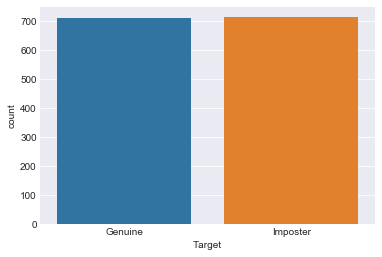

In [11]:
sns.set_style('darkgrid')
sns.countplot(x='Target',data=data)

# Split data into train and test data

In [12]:
train, test = train_test_split(data, test_size = 0.2)
features = list(data.columns[1:32])
X = data[features]
y =data['Target']
X_train = train[features]
y_train = train['Target']
X_test = test[features]
y_test = test['Target']

# Create logistic regression model and train it with training data

In [13]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Predict results 

In [14]:
pred = logmodel.predict(X_test)

In [15]:
df = pd.DataFrame(y_test)
se = pd.Series(pred)
df['Predictions'] = se.values
tempdf = pd.DataFrame(logmodel.predict_proba(X_test))
se1 = pd.Series(tempdf[0])
ew = se1.round(decimals=3)
df['Genuine probability'] = ew.values
se2 = pd.Series(tempdf[1])
ew1 = se2.round(decimals=3)
df['Imposter probability'] = ew1.values

In [16]:
df

,Target,Predictions,Genuine probability,Imposter probability
862,Imposter,Imposter,0.098,0.902
562,Genuine,Genuine,0.865,0.135
853,Imposter,Imposter,0.058,0.942
690,Genuine,Genuine,0.935,0.065
702,Genuine,Genuine,0.613,0.387
267,Genuine,Genuine,0.893,0.107
1307,Imposter,Imposter,0.000,1.000
787,Imposter,Imposter,0.116,0.884
1271,Imposter,Imposter,0.163,0.837
1414,Imposter,Imposter,0.113,0.887


# Check Performance of Model

**Accuracy**

In [17]:
model_accuracy = metrics.accuracy_score(y_test,pred)

In [18]:
y_test.value_counts()

Genuine     154
Imposter    131
Name: Target, dtype: int64

In [19]:
cm = confusion_matrix(y_test,pred)
print(confusion_matrix(y_test,pred))

[[149   5]
 [  5 126]]


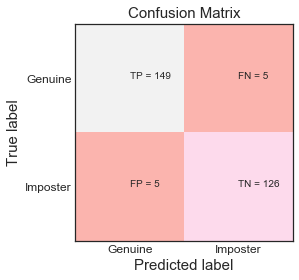

In [20]:
sns.set_style('white')
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Genuine','Imposter']
plt.title('Confusion Matrix',fontsize = 15)
plt.ylabel('True label',fontsize=15)
plt.xlabel('Predicted label',fontsize=15)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames,fontsize=12)
plt.yticks(tick_marks, classNames,fontsize=12)
s = [['TP','FN'], ['FP', 'TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

 ***Basic Terminology***
 
 ***True Positive (TP) : ***  We correctly predicted the user is Geninue
 
 ***True Negative (TN) : ***  We correctly predicted the user is Imposter
 
 ***False Positive (FP) : ***  We incorrectly predicted the user is geninue

 ***False Negative (FN) : ***  We incorrectly predicted the user is imposter 
 
  

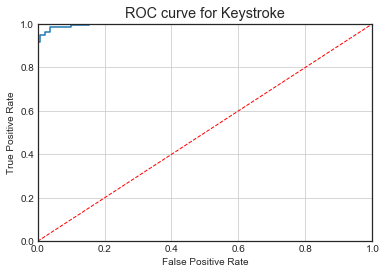

In [21]:
probs = logmodel.predict_proba(X_test)
preds = probs[:,0]
fpr, tpr,threshold= metrics.roc_curve(y_test, preds,pos_label='Genuine')
plt.figure()
lw = 1
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Keystroke')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
roc_auc= metrics.auc(fpr,tpr)

In [22]:
print("Accuracy of Model is: ", model_accuracy*100)
print()
print("Mis-Classification Rate of Model is: ",(1-model_accuracy)*100)
print()
print("Area Under Curve: ",roc_auc)

Accuracy of Model is:  96.49122807017544

Mis-Classification Rate of Model is:  3.508771929824561

Area Under Curve:  0.996827599881035


In [23]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

    Genuine       0.97      0.97      0.97       154
   Imposter       0.96      0.96      0.96       131

avg / total       0.96      0.96      0.96       285



# Parameter Tuning

Check For different random state variable in train_test_split function.

In [24]:
error_rate = []

# Will take some time
for i in range(1,70):
    train, test = train_test_split(data, test_size = 0.2, random_state=i)
    features = list(data.columns[1:32])
    X = data[features]
    X_train = train[features]
    y_train = train['Target']
    X_test = test[features]
    y_test = test['Target']    
    logmodel = LogisticRegression()
    
    logmodel.fit(X_train,y_train)
    pred = logmodel.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

(array([0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
 <a list of 9 Text yticklabel objects>)

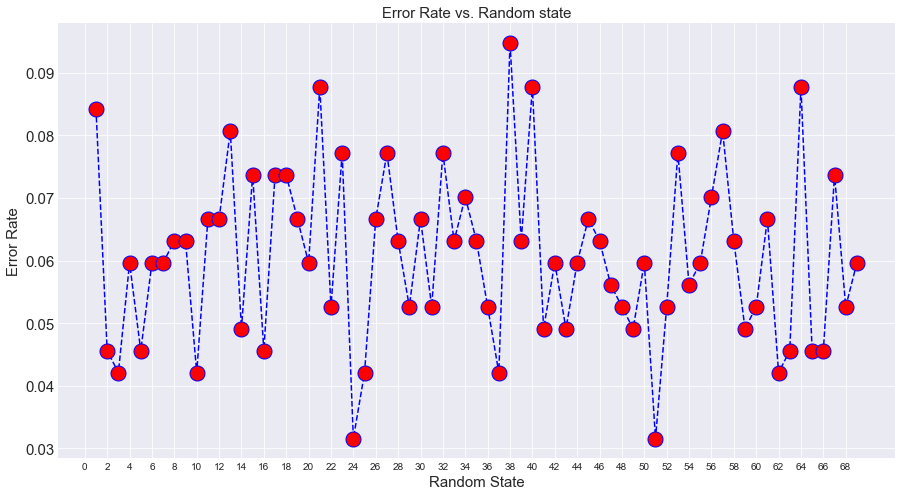

In [25]:
sns.set_style('darkgrid')

ax =plt.figure(figsize=(15,8)).add_subplot(1, 1, 1)
plt.plot(range(1,70),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=15,)

plt.title('Error Rate vs. Random state',fontsize=15)
plt.xlabel('Random State',fontsize=15)
plt.ylabel('Error Rate',fontsize=15)
major_ticks = np.arange(0, 70, 2)
minor_ticks = np.arange(0, 70, 1)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=15)

**From above graph we can say that error rate is minimum for random state num of 24 **

***Now lets check accuracy for different values of C while creating logistic regression model***

In [26]:
C_param_range = [0.001,0.01,0.1,1,10,100,1000]
accuracy = []

for i in C_param_range:
      
    train, test = train_test_split(data, test_size = 0.2,random_state = 13)
    features = list(data.columns[1:32])
    X = data[features]
    y =data['Target']
    X_train = train[features]
    y_train = train['Target']
    X_test = test[features]
    y_test = test['Target']
    logmodel = LogisticRegression(C=i)
    logmodel.fit(X_train,y_train)
    pred = logmodel.predict(X_test)
    model_accuracy = metrics.accuracy_score(y_test,pred)
    accuracy.append(model_accuracy)

Text(0,0.5,'Accuracy')

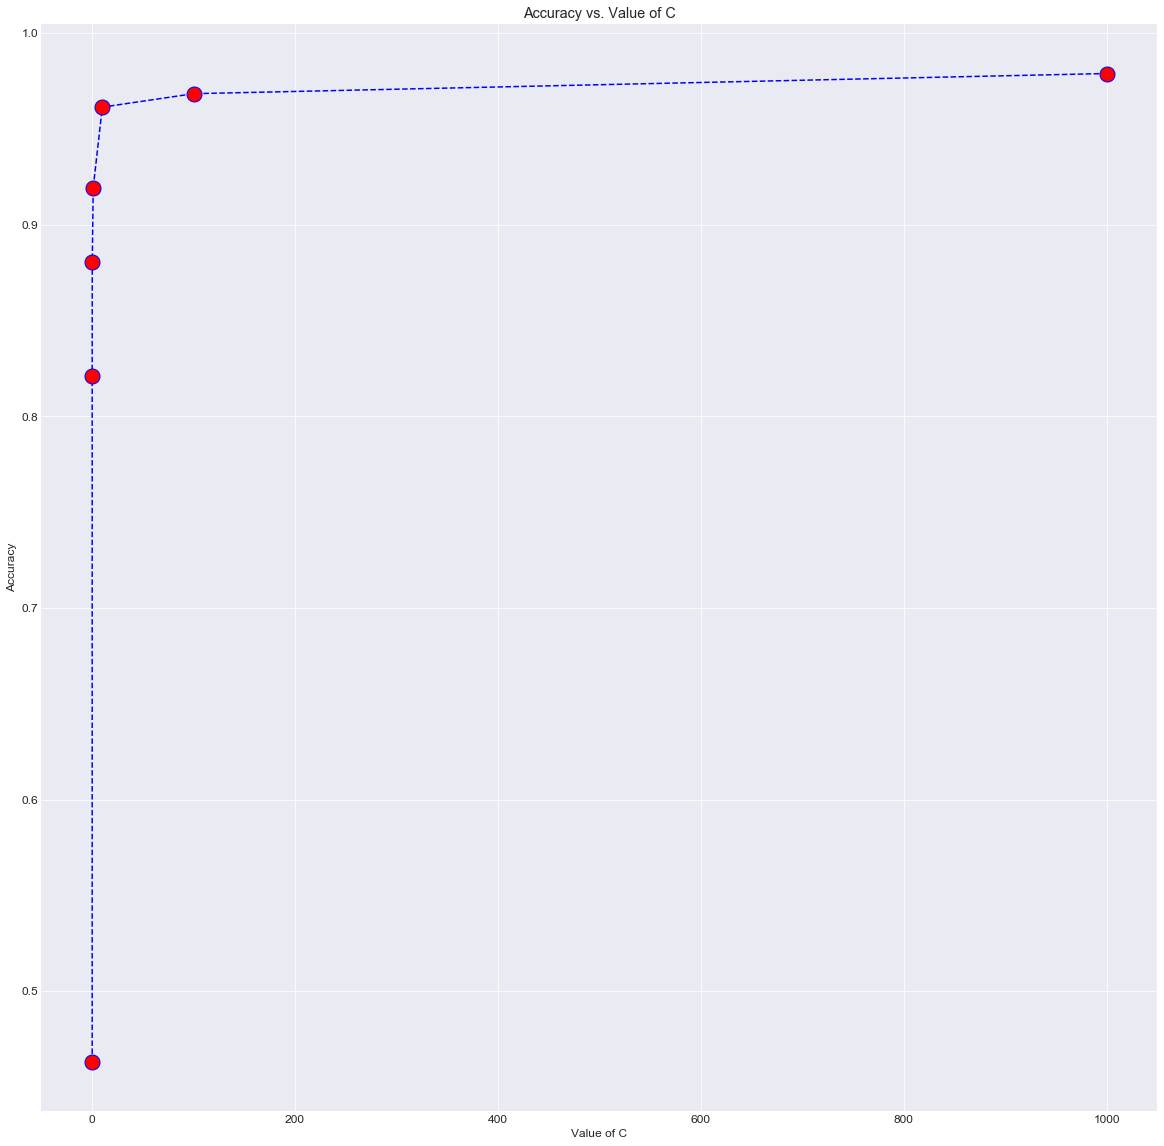

In [27]:
ax =plt.figure(figsize=(20,20))
plt.plot(C_param_range,accuracy,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=15)
plt.title('Accuracy vs. Value of C')
plt.xlabel('Value of C')
plt.ylabel('Accuracy')

In [28]:
C_prange = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
accuracy = []

for i in C_prange:
      
    train, test = train_test_split(data, test_size = i,random_state = 13)
    features = list(data.columns[1:32])
    X = data[features]
    y =data['Target']
    X_train = train[features]
    y_train = train['Target']
    X_test = test[features]
    y_test = test['Target']
    logmodel = LogisticRegression(C=100)
    logmodel.fit(X_train,y_train)
    pred = logmodel.predict(X_test)
    model_accuracy = metrics.accuracy_score(y_test,pred)
    accuracy.append(model_accuracy)

Text(0,0.5,'Accuracy')

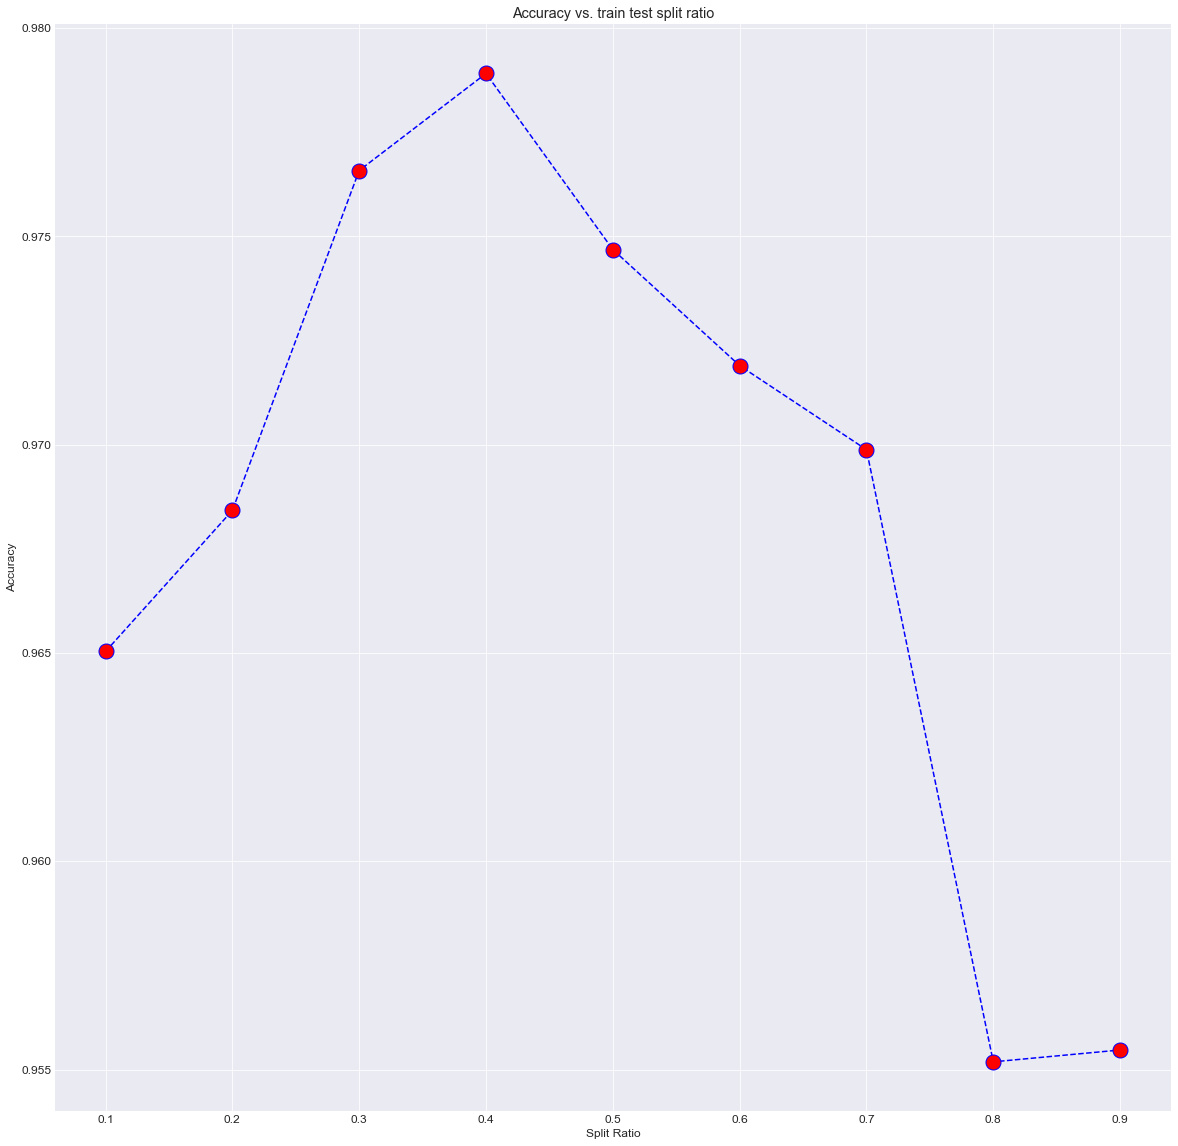

In [29]:
ax =plt.figure(figsize=(20,20))
plt.plot(C_prange,accuracy,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=15)
plt.title('Accuracy vs. train test split ratio')
plt.xlabel('Split Ratio')
plt.ylabel('Accuracy')

# Performance of model after parameter tuning.

In [30]:
train, test = train_test_split(data, test_size = 0.2, random_state= 24)
features = list(data.columns[1:32])
X = data[features]
y =data['Target']
X_train = train[features]
y_train = train['Target']
X_test = test[features]
y_test = test['Target']
logmodel = LogisticRegression(C=100)
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)
model_accuracy = metrics.accuracy_score(y_test,pred)
cm = confusion_matrix(y_test,pred)
print(confusion_matrix(y_test,pred))

[[143   0]
 [  2 140]]


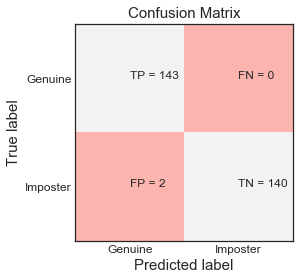

In [31]:
sns.set_style('white')
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Genuine','Imposter']
plt.title('Confusion Matrix',fontsize = 15)
plt.ylabel('True label',fontsize=15)
plt.xlabel('Predicted label',fontsize=15)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames,fontsize=12)
plt.yticks(tick_marks, classNames,fontsize=12)
s = [['TP','FN'], ['FP', 'TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Area under curve:  0.9998522604156407


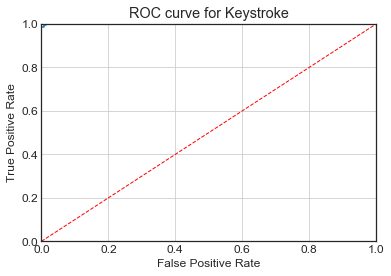

In [32]:
probs = logmodel.predict_proba(X_test)
preds = probs[:,0]
fpr, tpr,threshold= metrics.roc_curve(y_test, preds,pos_label='Genuine')
plt.figure()
lw = 1
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Keystroke')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
roc_auc= metrics.auc(fpr,tpr)
print("Area under curve: " ,roc_auc)

In [33]:
print("Accuracy of Model is: ",model_accuracy)
print()
print("Mis-Classification Rate of Model is: ",1 - model_accuracy)
print()
print("Area Under Curve: ",roc_auc)

Accuracy of Model is:  0.9929824561403509

Mis-Classification Rate of Model is:  0.007017543859649145

Area Under Curve:  0.9998522604156407


In [34]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

    Genuine       0.99      1.00      0.99       143
   Imposter       1.00      0.99      0.99       142

avg / total       0.99      0.99      0.99       285

